In [1]:
# Importing the various python libraries
import numpy as np # Python libraries used for working/dealing with arrays
import matplotlib.pyplot as plt # Aids in visualisation of the data
import os # Used to specify the locations of the file images
import cv2 # Converting the images into arrays - for image processing tasks
from tqdm import tqdm # Able to obtain (visualise) a precentage bar for tasks

In [2]:
DATADIR = "C:\Files\COVID-19 VS NON-COVID-19" # Location of the file that consist of COVID-19 & non-COVID-19

CATEGORIES = ["COVID", "NON-COVID"] # There are 2 folders respectively

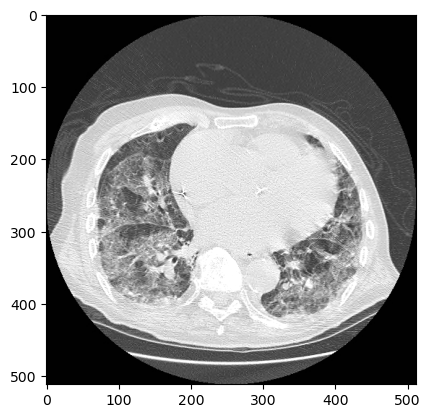

In [3]:
for category in CATEGORIES:  # Accessing into the CATEGORIES 
    path = os.path.join(DATADIR,category) # Joining of 2 different paths(DATADIR & category) - path to COVID and NON-COVID
    for img in os.listdir(path): # List all files that are present in the folder
        # cv2 converts the CT scan images into an array form, reading/converting the images into grayscale
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') # The colour is gray
        plt.show() # Showing of 1 image - ensuring and observing that all the images are in greyscale - uniform color
        break
    break

In [4]:
print(img_array)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [5]:
# Checking on the initial image size which is 512 x 512
print(img_array.shape)

(512, 512)


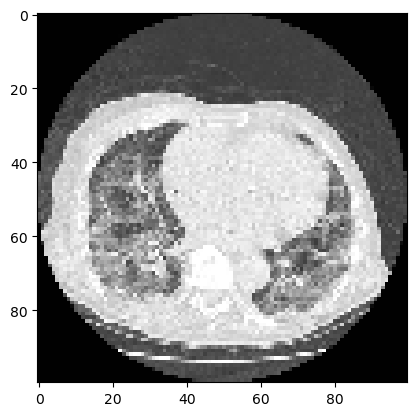

In [6]:
IMG_SIZE = 100 # Required to transform/change all the CT scan images into the same/uniform size 

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Converting new array of 100 by 100 pixel of the grayscale images
plt.imshow(new_array, cmap='gray')
plt.show() # Displaying one image of the resized grayscale images (size 100 x 100) 


In [7]:
# Creating training set (6030 - COVID & 6030 - NON-COVID)
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  # Joining of 2 different paths (DATADIR & category) path to COVID and NON-COVID
        class_num = CATEGORIES.index(category) # 0 for COVID and 1 for NON-COVID

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # Convert into grayscale
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resizing the grayscale images 100 x 100
                training_data.append([new_array, class_num]) # Append all the resized grayscale images into the training_data
            except Exception as e: # Except those images that are corrupted 
                pass
            
create_training_data()

100%|██████████| 6030/6030 [00:59<00:00, 100.58it/s]


In [ ]:
print(len(training_data))

In [10]:
import random

random.shuffle(training_data) # Required to shuffle the images so that they are mixed well before feeding it to the model

In [11]:
for sample in training_data[:10]: # Displaying the 1st to the 10th images
    print(sample[1]) # check if the images are mixed (randomized)

1
1
1
1
0
0
0
0
0
0


In [12]:
X = [] # Refers to the array values - features
y = [] # Refers to 0 for COVID and 1 for NON-COVID - labels

for features,label in training_data:
    X.append(features) # Store all the features into X
    y.append(label) # Store all the features into y

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Convert from array into numpy array for faster processing

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [13]:
# Using pickle to save the variables 'X' and'y'.
# Thus, we do not need to always re-calculate when using the deep learning model.
# We are able to load the current or new script

import pickle 

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
